# LINEAR REGRESSION MODELS

### 1)SKLEARN : LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
%matplotlib inline

In [3]:
df= pd.read_csv("Canada-per-capita-income.csv")

In [4]:
df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
df.rename(columns={'year':"Years","per capita income (US$)":"P.C.I. $"} ,inplace=True)

In [6]:
df.head(5)

,Years,P.C.I. $
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


Text(0, 0.5, 'Per-Capita-Income ($)')

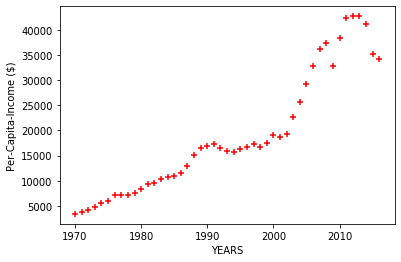

In [7]:
plt.scatter(df['Years'], df['P.C.I. $'], color="red",marker='+')
plt.xlabel("YEARS")
plt.ylabel("Per-Capita-Income ($)")


In [8]:
reg = linear_model.LinearRegression()

In [9]:
reg.fit(df[['Years']],df['P.C.I. $'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
reg.predict([[2050]])

array([66142.6463511])

In [11]:
reg.coef_

array([828.46507522])

In [12]:
reg.intercept_

-1632210.7578554575

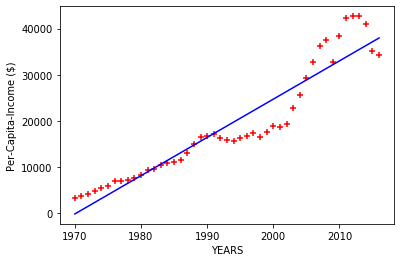

In [13]:
plt.scatter(df['Years'], df['P.C.I. $'], color="red",marker='+')
plt.xlabel("YEARS")
plt.ylabel("Per-Capita-Income ($)")
plt.plot(df['Years'],reg.predict(df[['Years']]),color="blue")

### 2) GRADIENT DESCENT ALGORITHM : LINEAR REGRESSION

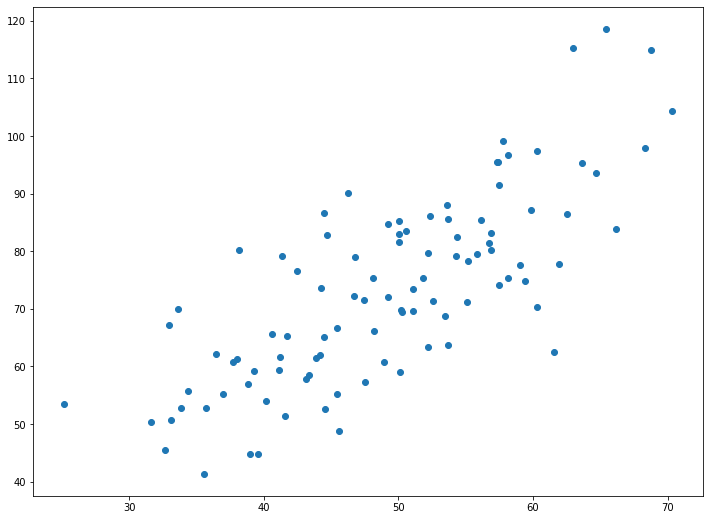

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)


data = pd.read_csv("data.csv")
X = data.iloc[:, 0]
Y = data.iloc[:, 1]
plt.scatter(X, Y)
plt.show()

#### OPTIMIZING THE COST FUNCTION "MEAN SQUARE ERROR" 

In [15]:
# creating the model

m = 0 
c = 0

L = 0.0001
iters = 1000

n= float(len(X))

for i in range(len(X)):
    Y_pred = m*X+c
    deri_m = (-2/n) * sum(X*(Y-Y_pred))
    deri_c = (-2/n)* sum(Y-Y_pred)
    
    m = m - L*deri_m
    c = c - L*deri_c
    
print(m,c)    



1.4809284677644328 0.0362353540942316


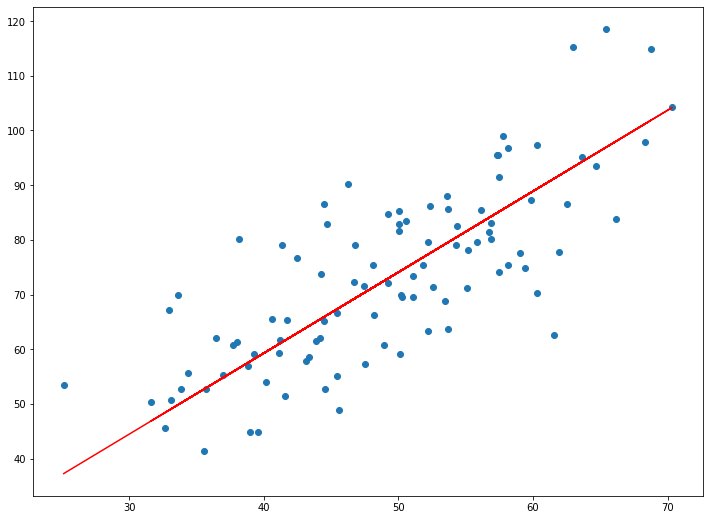

In [16]:
Y_pred = m*X+c
plt.scatter(X, Y)
plt.plot(X, Y_pred,color='red')
plt.show()

In [17]:
Y_pred

0     79.157510
1     91.158294
2     70.344262
3     88.615318
4     81.697872
        ...    
94    74.127345
95    72.956806
96    74.141268
97    71.342732
98    37.249724
Name: 32.502345269453031, Length: 99, dtype: float64

# MULTIVARIATE LINEAR REGRESSION

In [18]:
df1= pd.read_csv("hiring.csv")

In [19]:
df1

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000S
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000S
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
df1.rename(columns={'test_score(out of 10)':"testscore_10","interview_score(out of 10)":"inter_score","salary($)":"salary"},
           inplace =True)

In [21]:
df1

,experience,testscore_10,inter_score,salary
0,NaN,8.0,9,50000S
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000S
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [22]:
import math

med=df1.testscore_10.median()
df1.testscore_10 = df1.testscore_10.fillna(med)


In [23]:
from word2number import w2n

df1.experience = df1.experience.fillna("Zero")

In [24]:
for i in range(len(df1.experience)):
    s=df1.iloc[i,0]
    df1.iloc[i,0]=w2n.word_to_num(s)


In [25]:
df1

,experience,testscore_10,inter_score,salary
0,0,8.0,9,50000S
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000S
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [26]:
for j in range(len(df1.salary)):
    s=df1.iloc[j,3]
    if "S" in s:
        y=s.replace("S"," ")
        df1.iloc[j,3]=int(y)
        
    else:
        df1.iloc[j,3]=int(df1.iloc[j,3])
        
 

In [27]:
df1

,experience,testscore_10,inter_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [28]:
# creating our model

reg1 = linear_model.LinearRegression()
reg1.fit(df1[['experience','testscore_10','inter_score']],df1['salary'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
reg1.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [30]:
reg1.intercept_

17737.26346433771

In [37]:
reg.predict

<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

### SAVING THE MODEL TO FILE

In [40]:
from sklearn.externals import joblib

C:\Users\avime\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
joblib.dump(reg,'Regmodel')

['Regmodel']

In [42]:
rg = joblib.load('Regmodel')